In [18]:
import requests
import pandas as pd

url = "https://maps-data.p.rapidapi.com/searchmaps.php"

querystring = {"query":"restaurant","limit":"500","country":"us","lang":"en","lat":"17.4065","lng":"78.4772","offset":"0","zoom":"13"}

headers = {
	"X-RapidAPI-Key": "4548604807mshbdd27b9dc86a619p1db787jsn527a99548f8b",
	"X-RapidAPI-Host": "maps-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'data': [{'business_id': '0x3bcb975c49e36791:0xfb5782b9ea3c6614', 'phone_number': '+917416506228', 'name': 'Three Cheers Restaurant', 'full_address': 'Three Cheers Restaurant, Iqbal Minar Circle, AG Office Rd, Saifabad, Khairtabad, Hyderabad, Telangana 500004, India', 'latitude': 17.406984299999998, 'longitude': 78.467918, 'review_count': 2361, 'rating': 4.2, 'timezone': 'Asia/Calcutta', 'website': 'business.site', 'place_id': 'ChIJkWfjSVyXyzsRFGY86rmCV_s', 'place_link': 'https://www.google.com/maps/place/data=!3m1!4b1!4m2!3m1!1s0x3bcb975c49e36791:0xfb5782b9ea3c6614', 'types': ['Chinese restaurant', 'Indian restaurant', 'Seafood restaurant'], 'price_level': '$$', 'working_hours': {'Wednesday': ['12–11\u202fPM'], 'Thursday': ['12–11\u202fPM'], 'Friday': ['12–11\u202fPM'], 'Saturday': ['11:45\u202fAM–11:30\u202fPM'], 'Sunday': ['11:45\u202fAM–11:30\u202fPM'], 'Monday': ['12–11\u202fPM'], 'Tuesday': ['12–11\u202fPM']}, 'city': 'Hyderabad, Telangana, India', 'photos': [{'src': 'https://lh

In [43]:
df = pd.json_normalize(response.json() , record_path = ['data'])
df.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,state,description,working_hours.Wednesday,working_hours.Thursday,working_hours.Friday,working_hours.Saturday,working_hours.Sunday,working_hours.Monday,working_hours.Tuesday,working_hours
0,0x3bcb975c49e36791:0xfb5782b9ea3c6614,+917416506228,Three Cheers Restaurant,"Three Cheers Restaurant, Iqbal Minar Circle, A...",17.406984,78.467918,2361.0,4.2,Asia/Calcutta,business.site,...,Closes soon ⋅ 11 PM ⋅ Opens 12 PM Thu,"[Simple multicuisine restaurant, Low-key multi...",[12–11 PM],[12–11 PM],[12–11 PM],[11:45 AM–11:30 PM],[11:45 AM–11:30 PM],[12–11 PM],[12–11 PM],NaN
1,0x3bcb995143d8bf43:0xad477767233533eb,+917075844647,Kritunga The Palegar's Cuisine Restaurant - Hi...,Kritunga The Palegar's Cuisine Restaurant - Hi...,17.401007,78.486169,2270.0,4.4,Asia/Calcutta,None,...,Closes soon ⋅ 11 PM ⋅ Opens 12 PM Thu,[],[12–11 PM],[12–11 PM],[12–11 PM],[12–11 PM],[11:30 AM–11 PM],[11:30 AM–11 PM],[12–11 PM],NaN
2,0x3bcb99d8720642dd:0x9783488992302fc4,None,Ashoka Hotel,"9FVG+M9R Ashoka Hotel, Abids Road, Brook Bond ...",17.394243,78.475889,138.0,3.8,Asia/Calcutta,None,...,Open 24 hours,[],[Open 24 hours],[Open 24 hours],[Open 24 hours],[12 AM–11:59 PM],[Open 24 hours],[Open 24 hours],[Open 24 hours],NaN
3,0x3bcb99b155ce186d:0x5a3bf8a85a64af03,+919154775565,TANDOS RESTAURANT,"TANDOS RESTAURANT, 3-5-780, 1/B, King Kothi, O...",17.394758,78.485406,57.0,4.9,Asia/Calcutta,None,...,Open ⋅ Closes 1 AM,[],[12 PM–1 AM],[12 PM–1 AM],[12 PM–1 AM],[12 PM–1 AM],[12 PM–1 AM],[12 PM–1 AM],[12 PM–1 AM],NaN
4,0x3bcb99cd87dc821b:0x15ddbe06dd1baa34,+914023225641,Haiking restaurant,"Haiking restaurant, Building No. 3-6-276/1 & 2...",17.398225,78.484454,2095.0,4.0,Asia/Calcutta,None,...,Closes soon ⋅ 11 PM ⋅ Opens 11:30 AM Thu,[],"[11:30 AM–3 PM, 6–11 PM]","[11:30 AM–3 PM, 6–11 PM]","[11:30 AM–3 PM, 6–11 PM]","[11:30 AM–3 PM, 6–11 PM]","[11:30 AM–3 PM, 6–10:40 PM]","[11:30 AM–3 PM, 6–11 PM]","[11:30 AM–3 PM, 6–11 PM]",NaN


In [44]:
col = ['business_id' , 'latitude', 'longitude' , 'website' , 'place_id' , 'place_link' , 'working_hours.Wednesday' , 'working_hours.Thursday' , 'working_hours.Friday', 'working_hours.Saturday', 'working_hours.Sunday' , 'working_hours.Monday', 'working_hours.Tuesday' , 'working_hours']
df.drop(columns = col, inplace = True)

In [45]:
df

,phone_number,name,full_address,review_count,rating,timezone,types,price_level,city,photos,state,description
0,+917416506228,Three Cheers Restaurant,"Three Cheers Restaurant, Iqbal Minar Circle, A...",2361.0,4.2,Asia/Calcutta,"[Chinese restaurant, Indian restaurant, Seafoo...",$$,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,Closes soon ⋅ 11 PM ⋅ Opens 12 PM Thu,"[Simple multicuisine restaurant, Low-key multi..."
1,+917075844647,Kritunga The Palegar's Cuisine Restaurant - Hi...,Kritunga The Palegar's Cuisine Restaurant - Hi...,2270.0,4.4,Asia/Calcutta,"[Restaurant, Breakfast restaurant, Food court,...",$$,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,Closes soon ⋅ 11 PM ⋅ Opens 12 PM Thu,[]
2,None,Ashoka Hotel,"9FVG+M9R Ashoka Hotel, Abids Road, Brook Bond ...",138.0,3.8,Asia/Calcutta,[Asian restaurant],None,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,Open 24 hours,[]
3,+919154775565,TANDOS RESTAURANT,"TANDOS RESTAURANT, 3-5-780, 1/B, King Kothi, O...",57.0,4.9,Asia/Calcutta,[Barbecue restaurant],None,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,Open ⋅ Closes 1 AM,[]
4,+914023225641,Haiking restaurant,"Haiking restaurant, Building No. 3-6-276/1 & 2...",2095.0,4.0,Asia/Calcutta,[Chinese restaurant],$$,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,Closes soon ⋅ 11 PM ⋅ Opens 11:30 AM Thu,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
147,None,SHRAVAN KUMAR PHOTOGRAPHY,"SHRAVAN KUMAR PHOTOGRAPHY, 3-5-1095/1, opp. Bl...",54.0,3.7,Asia/Calcutta,"[Fast food restaurant, Hyderabadi restaurant, ...",None,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,None,[]
148,+918106828111,The Grand Plaza Hotel,"Pillar No: A 1255, The Grand Plaza Hotel, Publ...",1399.0,3.8,Asia/Calcutta,"[Restaurant, Banquet hall, Bed & breakfast, Bi...",None,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,None,"[Unfussy hotel with dining & Wi-Fi, Straightfo..."
149,+914067122000,Royalton Hotel,"Royalton Hotel, 5-9-208/2, Chirag Ali Ln, Mahe...",4781.0,4.1,Asia/Calcutta,"[Restaurant, Banquet hall, Caterer, Conference...",None,"Hyderabad, Telangana, India",[{'src': 'https://lh5.googleusercontent.com/p/...,None,"[Refined hotel with dining & a bar, Polished r..."
150,None,Derby Family Restaurant,"Derby Family Restaurant, Ratna Nagar, Kachigud...",2.0,4.5,Asia/Calcutta,[Family restaurant],None,"Hyderabad, Telangana, India",[{'src': 'https://streetviewpixels-pa.googleap...,None,[]


In [52]:
import mysql.connector as mysql
db = mysql.connect(host = 'localhost' , user = 'root' , password = 'root')


In [56]:
cursor = db.cursor

In [59]:
cursor.execute('use AiML')
cursor.fetchall()
cursor.execute('Select * from loandata')
data = cursor.fetchall()

AttributeError: 'function' object has no attribute 'execute'

In [1]:
import cv2

In [2]:
image = cv2.imread(r"C:\Users\User\Pictures\IMG_20201221_145016.jpg")

In [3]:
image

array([[[20, 31, 35],
        [17, 28, 32],
        [17, 28, 32],
        ...,
        [70, 54, 48],
        [71, 55, 49],
        [73, 57, 51]],

       [[16, 27, 31],
        [15, 26, 30],
        [17, 28, 32],
        ...,
        [70, 54, 48],
        [70, 54, 48],
        [71, 55, 49]],

       [[21, 33, 37],
        [20, 32, 36],
        [21, 34, 36],
        ...,
        [71, 55, 49],
        [69, 53, 47],
        [69, 53, 47]],

       ...,

       [[23, 46, 42],
        [23, 46, 42],
        [24, 45, 42],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [31, 31, 31]],

       [[22, 45, 41],
        [22, 45, 41],
        [21, 44, 39],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [30, 30, 30]],

       [[21, 44, 40],
        [21, 44, 40],
        [20, 43, 38],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [30, 30, 30]]], dtype=uint8)

In [ ]:
cv2.imshow('ADNAN' , image)
cv2.waitKey(0)
cv2.destroyAllWindows

In [3]:
import numpy as np

In [ ]:
arr = np.zeros((500,500))
cv2.imshow('Black' , arr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
arr = np.ones((500,500))
cv2.imshow('Black' , arr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
rand = np.random.randint(0,255,1000000).reshape(1000,1000)
cv2.imshow('Black' , rand)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:155: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User\anaconda3\envs\Python\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
     

In [6]:
image = cv2.imread(r"C:\Users\User\Downloads\pexels-pixabay-45170.jpg")

In [16]:
New = cv2.cvtColor(image , cv2.COLOR_BGR2YCR_CB)
cv2.imshow('Black' , New)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Data Collection Practise

In [1]:
import pandas as pd
import numpy as np
import cv2
import urllib.request
import os

In [28]:
import requests

url = "https://free-images-api.p.rapidapi.com/images/bmwcar"

headers = {
	"X-RapidAPI-Key": "4548604807mshbdd27b9dc86a619p1db787jsn527a99548f8b",
	"X-RapidAPI-Host": "free-images-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'results': [{'image': 'https://images.unsplash.com/photo-1633460463804-fbe4026990d6?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fDB8fHww', 'by': 'https://unsplash.com/@aga4ar', 'download': 'https://unsplash.com/photos/d0YzTSQPOtw/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fHx8MTcwNTgyMjA3OHww&force=true', 'source': 'https://unsplash.com', 'diffrentSizes': ['https://images.unsplash.com/photo-1633460463804-fbe4026990d6?w=100&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fDB8fHww', 'https://images.unsplash.com/photo-1633460463804-fbe4026990d6?w=200&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fDB8fHww', 'https://images.unsplash.com/photo-1633460463804-fbe4026990d6?w=300&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fDB8fHww', 'https://images.unsplash.com/photo-1633460463804-fbe4026990d6?w=4

In [29]:
df = pd.json_normalize(response.json() , record_path= ['results'])

In [30]:
for i in df['image']:
    print(i)

https://images.unsplash.com/photo-1633460463804-fbe4026990d6?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Ym13Y2FyfGVufDB8fDB8fHww
https://images.unsplash.com/photo-1676761136522-6d0b1a9bc95f?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Ym13Y2FyfGVufDB8fDB8fHww
https://images.unsplash.com/photo-1676761136925-900da9b58200?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8Ym13Y2FyfGVufDB8fDB8fHww
https://images.unsplash.com/photo-1676761136587-e9443fbd5273?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8Ym13Y2FyfGVufDB8fDB8fHww
https://images.unsplash.com/photo-1676761136632-011201e2468e?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NXx8Ym13Y2FyfGVufDB8fDB8fHww
https://images.unsplash.com/photo-1676761136514-313dff13b663?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Nnx8Ym13Y2FyfGVufDB8fDB8fHw

In [31]:
n = 20
for i in df['image']:
    urllib.request.urlretrieve(i , f'E:\\#Data Science Innomatics\\Module 6 Ai-ML\\Image Data\\sports cars\\scar{n}.jpg')
    n = n+1

In [33]:
os.chdir(r'E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\sports cars')

In [34]:
os.listdir()

['scar0.jpg',
 'scar1.jpg',
 'scar10.jpg',
 'scar11.jpg',
 'scar12.jpg',
 'scar13.jpg',
 'scar14.jpg',
 'scar15.jpg',
 'scar16.jpg',
 'scar17.jpg',
 'scar18.jpg',
 'scar19.jpg',
 'scar2.jpg',
 'scar20.jpg',
 'scar21.jpg',
 'scar22.jpg',
 'scar23.jpg',
 'scar24.jpg',
 'scar25.jpg',
 'scar26.jpg',
 'scar27.jpg',
 'scar28.jpg',
 'scar29.jpg',
 'scar3.jpg',
 'scar30.jpg',
 'scar31.jpg',
 'scar32.jpg',
 'scar33.jpg',
 'scar34.jpg',
 'scar35.jpg',
 'scar36.jpg',
 'scar37.jpg',
 'scar38.jpg',
 'scar39.jpg',
 'scar4.jpg',
 'scar5.jpg',
 'scar6.jpg',
 'scar7.jpg',
 'scar8.jpg',
 'scar9.jpg']

In [36]:
arr = []
label = []
for i in os.listdir():
    path = os.getcwd() + f'\\{i}'
    image = cv2.imread(path)
    image = cv2.resize(image , (5,8))
    arr.append(image.flatten())
    label.append('Sport Car')

In [37]:
data = pd.DataFrame(arr)

In [39]:
data['Label'] = label

In [40]:
data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Label
0,3,6,20,21,53,47,100,106,102,16,...,18,30,61,13,23,36,14,33,65,Sport Car
1,188,156,83,203,184,146,213,207,200,250,...,71,170,255,92,132,187,59,81,126,Sport Car
2,43,76,37,161,164,127,71,111,90,125,...,174,187,169,141,158,146,138,165,146,Sport Car
3,112,131,144,211,226,238,186,210,217,96,...,46,37,24,81,82,79,49,39,22,Sport Car
4,74,127,140,113,157,164,151,186,191,123,...,25,26,24,190,165,154,49,40,36,Sport Car
5,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,Sport Car
6,130,146,158,159,181,191,182,200,209,199,...,19,17,11,18,13,9,20,16,11,Sport Car
7,75,88,87,175,211,247,204,218,236,61,...,79,85,88,80,84,91,118,136,149,Sport Car
8,31,89,7,45,113,78,97,150,103,137,...,215,212,204,217,216,212,203,203,203,Sport Car
9,0,42,55,249,249,249,142,209,251,12,...,0,3,21,0,3,18,7,48,150,Sport Car


In [41]:
import pandas as pd
import numpy as np
import cv2
import requests
import os
import urllib.request

In [42]:
import requests

url = "https://free-images-api.p.rapidapi.com/images/sportsbike"

headers = {
	"X-RapidAPI-Key": "4548604807mshbdd27b9dc86a619p1db787jsn527a99548f8b",
	"X-RapidAPI-Host": "free-images-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'results': [{'image': 'https://images.unsplash.com/photo-1542683088-abb3da334598?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D', 'by': 'https://unsplash.com/@ericmichael', 'download': 'https://unsplash.com/photos/KA9W4k0pOn4/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHx8fDE3MDU4MjI5MzZ8MA&force=true', 'source': 'https://unsplash.com', 'diffrentSizes': ['https://images.unsplash.com/photo-1542683088-abb3da334598?w=100&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D', 'https://images.unsplash.com/photo-1542683088-abb3da334598?w=200&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D', 'https://images.unsplash.com/photo-1542683088-abb3da334598?w=300&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D', 'https://images.un

In [43]:
df = pd.json_normalize(response.json() , record_path= ['results'])

In [45]:
for i in df['image']:
    print(i)

https://images.unsplash.com/photo-1542683088-abb3da334598?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D
https://images.unsplash.com/photo-1529946607596-ce8147321723?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D
https://images.unsplash.com/photo-1588679828978-30131b5b9d15?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D
https://images.unsplash.com/photo-1700295617594-2151de5db8e4?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D
https://images.unsplash.com/photo-1693681341384-6978c5513347?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NXx8c3BvcnRzYmlrZXxlbnwwfHwwfHx8MA%3D%3D
https://images.unsplash.com/photo-1664268066355-29019c29ffc9?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3

In [48]:
os.chdir(r'C:\Users\User\AI-ML-Inn')

In [49]:
os.getcwd()

'C:\\Users\\User\\AI-ML-Inn'

In [53]:
n = 1
for i in df['image']:
    urllib.request.urlretrieve(i , f'E:\\#Data Science Innomatics\\Module 6 Ai-ML\\Image Data\\bikes\\bike{n}.jpg')
    n = n+1

In [56]:
os.chdir(r'E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\bikes')

In [57]:
os.listdir()

['bike1.jpg',
 'bike10.jpg',
 'bike11.jpg',
 'bike12.jpg',
 'bike13.jpg',
 'bike14.jpg',
 'bike15.jpg',
 'bike16.jpg',
 'bike17.jpg',
 'bike18.jpg',
 'bike19.jpg',
 'bike2.jpg',
 'bike20.jpg',
 'bike3.jpg',
 'bike4.jpg',
 'bike5.jpg',
 'bike6.jpg',
 'bike7.jpg',
 'bike8.jpg',
 'bike9.jpg']

In [66]:
arr  = []
label = []
for i in os.listdir():
    path = os.getcwd() + f'\\{i}'
    image = cv2.imread(path)
    image = cv2.resize(image , (5,4))
    arr.append(image.flatten())
    label.append('Sport Bike')

In [67]:
df = pd.DataFrame(arr)

In [69]:
df['Label'] = label

In [70]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,125,105,75,242,228,206,253,250,245,251,...,156,127,81,115,94,61,21,23,27,Sport Bike
1,215,215,215,204,204,204,255,255,255,130,...,87,87,87,196,196,196,194,194,194,Sport Bike
2,187,168,141,91,88,78,172,159,141,60,...,142,143,158,142,146,164,32,42,59,Sport Bike
3,143,197,228,142,205,239,149,204,235,153,...,30,47,60,36,50,56,35,43,56,Sport Bike
4,120,111,112,8,1,127,0,0,149,79,...,4,4,4,1,1,125,5,3,4,Sport Bike
5,14,19,18,17,32,31,9,30,31,253,...,20,45,49,35,51,57,34,44,47,Sport Bike
6,20,19,21,18,18,18,17,17,17,22,...,43,47,48,21,23,23,23,25,25,Sport Bike
7,77,83,84,111,110,111,89,87,87,84,...,225,217,231,211,223,240,92,98,117,Sport Bike
8,213,201,187,220,235,251,224,225,224,217,...,108,119,139,39,43,49,133,136,140,Sport Bike
9,41,43,44,43,42,44,24,24,24,22,...,62,55,75,57,51,66,76,69,81,Sport Bike


### Live image data collection

In [71]:
os.chdir(r'E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\live images')

In [73]:
os.listdir()

['image0.jpg',
 'image1.jpg',
 'image10.jpg',
 'image100.jpg',
 'image101.jpg',
 'image102.jpg',
 'image103.jpg',
 'image104.jpg',
 'image105.jpg',
 'image106.jpg',
 'image107.jpg',
 'image108.jpg',
 'image109.jpg',
 'image11.jpg',
 'image110.jpg',
 'image111.jpg',
 'image112.jpg',
 'image113.jpg',
 'image114.jpg',
 'image115.jpg',
 'image116.jpg',
 'image117.jpg',
 'image118.jpg',
 'image119.jpg',
 'image12.jpg',
 'image120.jpg',
 'image121.jpg',
 'image122.jpg',
 'image123.jpg',
 'image124.jpg',
 'image125.jpg',
 'image126.jpg',
 'image127.jpg',
 'image128.jpg',
 'image129.jpg',
 'image13.jpg',
 'image130.jpg',
 'image131.jpg',
 'image132.jpg',
 'image133.jpg',
 'image134.jpg',
 'image135.jpg',
 'image136.jpg',
 'image137.jpg',
 'image138.jpg',
 'image139.jpg',
 'image14.jpg',
 'image140.jpg',
 'image141.jpg',
 'image142.jpg',
 'image143.jpg',
 'image144.jpg',
 'image145.jpg',
 'image146.jpg',
 'image147.jpg',
 'image148.jpg',
 'image149.jpg',
 'image15.jpg',
 'image150.jpg',
 'image

In [78]:
arr = []
label = []
for i in os.listdir():
    path = os.getcwd() + f'\\{i}'
    image = cv2.imread(path)
    image = cv2.resize(image, (8,5))
    arr.append(image.flatten())
    label.append("Live Images")

In [79]:
df = pd.DataFrame(arr)

In [81]:
df['Label'] = label

In [82]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Label
0,130,138,133,131,136,131,121,125,120,119,...,7,11,20,117,124,132,99,106,111,Live Images
1,133,139,138,129,136,132,124,129,127,113,...,4,9,18,113,125,138,100,109,121,Live Images
2,138,149,130,143,150,132,131,140,120,125,...,9,12,17,121,135,141,112,121,118,Live Images
3,140,146,142,142,146,137,132,139,126,127,...,7,8,15,125,136,139,116,120,122,Live Images
4,140,146,142,142,146,137,132,139,126,127,...,7,8,15,125,136,139,116,120,122,Live Images


In [83]:
arr = []
label = []
os.chdir(r'E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\live images')
for i in os.listdir():
    path = os.getcwd() + f'\\{i}'
    image = cv2.imread(path)
    image = cv2.resize(image, (8,5))
    arr.append(image.flatten())
    label.append("Live Images")
df = pd.DataFrame(arr)
df['Label'] = label
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Label
0,130,138,133,131,136,131,121,125,120,119,...,7,11,20,117,124,132,99,106,111,Live Images
1,133,139,138,129,136,132,124,129,127,113,...,4,9,18,113,125,138,100,109,121,Live Images
2,138,149,130,143,150,132,131,140,120,125,...,9,12,17,121,135,141,112,121,118,Live Images
3,140,146,142,142,146,137,132,139,126,127,...,7,8,15,125,136,139,116,120,122,Live Images
4,140,146,142,142,146,137,132,139,126,127,...,7,8,15,125,136,139,116,120,122,Live Images
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,139,144,142,137,144,138,136,137,129,122,...,20,16,24,126,134,140,108,114,124,Live Images
197,139,144,142,137,144,138,136,137,129,122,...,20,16,24,126,134,140,108,114,124,Live Images
198,140,147,137,137,142,137,129,135,130,122,...,13,8,19,124,133,146,102,114,123,Live Images
199,140,147,137,137,142,137,129,135,130,122,...,13,8,19,124,133,146,102,114,123,Live Images


In [86]:
animal = ['cat' , 'dog' , 'cow']
arr = []
label = []

for i in animal:
    import requests

    url = f"https://free-images-api.p.rapidapi.com/images/{i}"

    headers = {
        "X-RapidAPI-Key": "4548604807mshbdd27b9dc86a619p1db787jsn527a99548f8b",
        "X-RapidAPI-Host": "free-images-api.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers)
    df = pd.json_normalize(response.json() , record_path=['results'])
    

{'results': [{'image': 'https://plus.unsplash.com/premium_photo-1677101221533-52b45823a2dc?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0fGVufDB8fDB8fHww', 'by': 'https://unsplash.com/plus?referrer=%2Fphotos%2Fa-cat-sitting-on-top-of-a-green-cushion-JticgxGJ95c', 'source': 'https://unsplash.com', 'diffrentSizes': ['https://plus.unsplash.com/premium_photo-1677101221533-52b45823a2dc?w=100&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677101221533-52b45823a2dc?w=200&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677101221533-52b45823a2dc?w=300&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677101221533-52b45823a2dc?w=400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8

{'results': [{'image': 'https://plus.unsplash.com/premium_photo-1677542200557-3c6856cc98b1?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nfGVufDB8fDB8fHww', 'by': 'https://unsplash.com/plus?referrer=%2Fphotos%2Fa-black-and-white-dog-laying-on-top-of-a-white-floor-GjUSnrVpt_0', 'source': 'https://unsplash.com', 'diffrentSizes': ['https://plus.unsplash.com/premium_photo-1677542200557-3c6856cc98b1?w=100&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nfGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677542200557-3c6856cc98b1?w=200&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nfGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677542200557-3c6856cc98b1?w=300&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8ZG9nfGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1677542200557-3c6856cc98b1?w=400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid

{'results': [{'image': 'https://plus.unsplash.com/premium_photo-1661962510497-9505129083fa?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y293fGVufDB8fDB8fHww', 'by': 'https://unsplash.com/plus?referrer=%2Fphotos%2Fherd-of-young-white-cows-on-green-meadow-hxVkNG-yeuo', 'source': 'https://unsplash.com', 'diffrentSizes': ['https://plus.unsplash.com/premium_photo-1661962510497-9505129083fa?w=100&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y293fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1661962510497-9505129083fa?w=200&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y293fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1661962510497-9505129083fa?w=300&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y293fGVufDB8fDB8fHww', 'https://plus.unsplash.com/premium_photo-1661962510497-9505129083fa?w=400&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB

In [87]:
lst = ['cat', 'dog', 'elephant', 'parrot', 'cow']
n=0
arr = []
label = []
for i in lst:
    
    
    url = f"https://free-images-api.p.rapidapi.com/images/{i}"

    headers = {
        "X-RapidAPI-Key": "210c3f68bcmsh385021a1051c143p1bf373jsn1c3eb5d97ea3",
        "X-RapidAPI-Host": "free-images-api.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers)
    
    df = pd.json_normalize(response.json(),record_path=['results'])
    
    folder_path = f'E:\\#Data Science Innomatics\\Module 6 Ai-ML\\Image Data\\ForLoop\\{i}'
    os.makedirs(folder_path, exist_ok=True)
    
    os.chdir(f'E:\\#Data Science Innomatics\\Module 6 Ai-ML\\Image Data\\ForLoop\\{i}')
    
    
    for j in df['image']:
        urllib.request.urlretrieve(j,f'E:\\#Data Science Innomatics\\Module 6 Ai-ML\\Image Data\\ForLoop\\{i}\\{i}{n}.jpg')
        n = n+1
    for k in os.listdir():
        path = os.getcwd()+f'\\{k}'
        image = cv2.imread(path)
        image = cv2.resize(image,(5,4))
        arr.append(image.flatten())
        label.append(i)
data = pd.DataFrame(arr)
data['label'] = label
    
    

In [88]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,14,136,196,0,96,166,2,115,187,1,...,40,59,50,32,55,50,10,26,18,cat
1,109,140,77,120,154,83,124,158,88,121,...,68,107,146,138,148,154,61,88,118,cat
2,82,180,226,85,184,228,90,185,228,77,...,73,116,158,101,145,183,65,165,213,cat
3,108,105,104,111,109,109,117,112,113,117,...,177,182,185,66,73,76,167,171,176,cat
4,196,199,203,122,139,158,105,126,147,65,...,33,54,81,112,131,152,75,95,113,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100,109,124,91,101,108,36,49,56,236,...,62,75,91,77,89,101,70,78,85,cow
96,3,3,17,230,238,238,96,120,135,230,...,148,158,168,131,147,160,133,143,153,cow
97,185,172,150,209,198,180,215,208,191,229,...,5,89,36,0,80,28,3,87,41,cow
98,203,144,95,213,156,105,215,157,108,211,...,62,115,108,35,105,103,44,90,79,cow


### Display VIdeo

In [2]:
import cv2

In [3]:
vid = cv2.VideoCapture(r"C:\Users\User\Downloads\10 Second High Resolation 4k Video..mp4")
while True:
    x, img = vid.read()
    cv2.imshow("4k Video" , img)
    if cv2.waitKey(10) & 255 == ord("q"):
        cv2.destroyAllWindows()
        break
        

In [4]:
video = cv2.VideoCapture(r"C:\Users\User\Downloads\10 Second High Resolation 4k Video..mp4")
while True :
    x , img = video.read()
    cv2.imshow("My 4k Sea Video" , img)
    if cv2.waitKey(50) & 255 == ord("a"):
        cv2.destroyAllWindows()
        break

### Saving video to images

In [6]:
video = cv2.VideoCapture(r"C:\Users\User\Downloads\10 Second High Resolation 4k Video..mp4")
i = 0
while True:
    x , img = video.read()
    cv2.imwrite(f'E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\4K Sea\sea{i}.jpg', img)
    if i == 200:
        break
    i = i+1

In [ ]:
E:\#Data Science Innomatics\Module 6 Ai-ML\Image Data\4K Sea

### Text Data Preprocessing

#### Lower Case

In [1]:
string = '''Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured, object-oriented and functional programming.'''

In [3]:
string = string.lower()

In [4]:
string

'python is a high-level, general-purpose programming language. its design philosophy emphasizes code readability with the use of significant indentation. python is dynamically typed and garbage-collected. it supports multiple programming paradigms, including structured, object-oriented and functional programming.'

In [7]:
import pandas as pd
df = pd.read_csv(r"E:\#Data Science Innomatics\Module 6 Ai-ML\Datasets\Datasets\loandata.csv")

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
610,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
612,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


In [14]:
df['Gender'] = df['Gender'].str.lower()

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001640,male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
610,LP001536,male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
612,LP002101,male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


In [19]:
df['Education'] = df['Education'].str.lower()
df['Property_Area'] = df['Property_Area'].str.lower()

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,male,Yes,0,graduate,No,150,1800.0,135.0,360.0,1.0,rural,N
1,LP002502,female,Yes,2,not graduate,NaN,210,2917.0,98.0,360.0,1.0,semiurban,Y
2,LP002949,female,No,3+,graduate,NaN,416,41667.0,350.0,180.0,NaN,urban,N
3,LP002603,female,No,0,graduate,No,645,3683.0,113.0,480.0,1.0,rural,Y
4,LP001644,NaN,Yes,0,graduate,Yes,674,5296.0,168.0,360.0,1.0,rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001640,male,Yes,0,graduate,Yes,39147,4750.0,120.0,360.0,1.0,semiurban,Y
610,LP001536,male,Yes,3+,graduate,No,39999,0.0,600.0,180.0,0.0,semiurban,Y
611,LP001585,NaN,Yes,3+,graduate,No,51763,0.0,700.0,300.0,1.0,urban,Y
612,LP002101,male,Yes,0,graduate,NaN,63337,0.0,490.0,180.0,1.0,urban,Y


#### Tokenization

In [77]:
string = '''Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured, object-oriented and functional programming.'''

In [26]:
string.split()

['Python',
 'is',
 'a',
 'high-level,',
 'general-purpose',
 'programming',
 'language.',
 'Its',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'with',
 'the',
 'use',
 'of',
 'significant',
 'indentation.',
 'Python',
 'is',
 'dynamically',
 'typed',
 'and',
 'garbage-collected.',
 'It',
 'supports',
 'multiple',
 'programming',
 'paradigms,',
 'including',
 'structured,',
 'object-oriented',
 'and',
 'functional',
 'programming.']

In [27]:
import nltk

In [28]:
from nltk.tokenize import word_tokenize , sent_tokenize

In [29]:
word_tokenize(string)

['Python',
 'is',
 'a',
 'high-level',
 ',',
 'general-purpose',
 'programming',
 'language',
 '.',
 'Its',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'with',
 'the',
 'use',
 'of',
 'significant',
 'indentation',
 '.',
 'Python',
 'is',
 'dynamically',
 'typed',
 'and',
 'garbage-collected',
 '.',
 'It',
 'supports',
 'multiple',
 'programming',
 'paradigms',
 ',',
 'including',
 'structured',
 ',',
 'object-oriented',
 'and',
 'functional',
 'programming',
 '.']

In [30]:
sent_tokenize(string)

['Python is a high-level, general-purpose programming language.',
 'Its design philosophy emphasizes code readability with the use of significant indentation.',
 'Python is dynamically typed and garbage-collected.',
 'It supports multiple programming paradigms, including structured, object-oriented and functional programming.']

In [33]:
from nltk.tokenize import word_tokenize , sent_tokenize

In [34]:
word_tokenize(string)

['Python',
 'is',
 'a',
 'high-level',
 ',',
 'general-purpose',
 'programming',
 'language',
 '.',
 'Its',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'with',
 'the',
 'use',
 'of',
 'significant',
 'indentation',
 '.',
 'Python',
 'is',
 'dynamically',
 'typed',
 'and',
 'garbage-collected',
 '.',
 'It',
 'supports',
 'multiple',
 'programming',
 'paradigms',
 ',',
 'including',
 'structured',
 ',',
 'object-oriented',
 'and',
 'functional',
 'programming',
 '.']

#### Spelling correction

In [46]:
import textblob

In [48]:
from textblob import TextBlob

In [49]:
string = 'The beautifl flowers in the gardn bloomed with vibrant colurs, He received a surprize gift from his freind on his barthday.'


In [50]:
txt = TextBlob(string)

In [51]:
txt

TextBlob("The beautifl flowers in the gardn bloomed with vibrant colurs, He received a surprize gift from his freind on his barthday.")

In [56]:
from textblob import TextBlob

In [57]:
TextBlob(string)

TextBlob("The beautifl flowers in the gardn bloomed with vibrant colurs, He received a surprize gift from his freind on his barthday.")

In [52]:
import autocorrect

In [54]:
spell = autocorrect.Speller()

In [55]:
spell.autocorrect_sentence(string)

'The beautiful flowers in the garden blooded with vibrant colors, He received a surprise gift from his friend on his birthday.'

In [58]:
import autocorrect

In [59]:
spell = autocorrect.Speller()

In [60]:
spell.autocorrect_sentence(string)

'The beautiful flowers in the garden blooded with vibrant colors, He received a surprise gift from his friend on his birthday.'

In [61]:
import autocorrect

In [62]:
spell = autocorrect.Speller()

In [63]:
spell.autocorrect_sentence(string)

'The beautiful flowers in the garden blooded with vibrant colors, He received a surprise gift from his friend on his birthday.'

#### Emoji Prediction

In [64]:
import emoji

In [66]:
emoji.demojize('🤣')

':rolling_on_the_floor_laughing:'

In [67]:
import emoji

In [69]:
emoji.demojize('😱')

':face_screaming_in_fear:'

In [70]:
import emoji

In [73]:
emoji.demojize('🤡')

':clown_face:'

#### Removing Stopping word

In [74]:
from nltk.corpus import stopwords

In [75]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
string

'Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured, object-oriented and functional programming.'

In [80]:
t = string.lower().split()

In [81]:
new = []
for i in t:
    if i not in stopwords.words('english'):
        new.append(i)

In [82]:
new

['python',
 'high-level,',
 'general-purpose',
 'programming',
 'language.',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'use',
 'significant',
 'indentation.',
 'python',
 'dynamically',
 'typed',
 'garbage-collected.',
 'supports',
 'multiple',
 'programming',
 'paradigms,',
 'including',
 'structured,',
 'object-oriented',
 'functional',
 'programming.']

In [83]:
from nltk.corpus import stopwords

In [85]:
txt = string.lower().split()

In [86]:
new = []
for i in txt:
    if i not in stopwords.words('english'):
        new.append(i)

In [87]:
new

['python',
 'high-level,',
 'general-purpose',
 'programming',
 'language.',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'use',
 'significant',
 'indentation.',
 'python',
 'dynamically',
 'typed',
 'garbage-collected.',
 'supports',
 'multiple',
 'programming',
 'paradigms,',
 'including',
 'structured,',
 'object-oriented',
 'functional',
 'programming.']

In [95]:
stopwords.words('arabic')

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [96]:
from nltk.corpus import stopwords

In [97]:
txt = string.lower().split()

In [98]:
n = []
for i in txt:
    if i not in stopwords.words('english'):
        n.append(i)

In [99]:
n

['python',
 'high-level,',
 'general-purpose',
 'programming',
 'language.',
 'design',
 'philosophy',
 'emphasizes',
 'code',
 'readability',
 'use',
 'significant',
 'indentation.',
 'python',
 'dynamically',
 'typed',
 'garbage-collected.',
 'supports',
 'multiple',
 'programming',
 'paradigms,',
 'including',
 'structured,',
 'object-oriented',
 'functional',
 'programming.']

#### Stemming

In [100]:
from nltk.stem import PorterStemmer

In [101]:
stem = PorterStemmer()

In [103]:
stem.stem('playing')

'play'

In [104]:
from nltk.stem import PorterStemmer

In [105]:
stemm = PorterStemmer()

In [116]:
stemm.stem('walking')

'walk'

In [107]:
stemm.stem('programming')

'program'

In [108]:
stemm.stem('functionality')

'function'

In [109]:
stemm.stem('objection')

'object'

#### Lemmatization

In [111]:
from nltk.stem import WordNetLemmatizer

In [112]:
lemm = WordNetLemmatizer()

In [120]:
lemm.lemmatize('preprocessing')

'preprocessing'

In [121]:
from nltk.stem import WordNetLemmatizer

In [122]:
lemm = WordNetLemmatizer()

In [33]:
import pandas as pd
import autocorrect
import textblob
import re
import emoji
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df['Text']

0       Enjoying a beautiful day at the park!        ...
1       Traffic was terrible this morning.           ...
2       Just finished an amazing workout! 💪          ...
3       Excited about the upcoming weekend getaway!  ...
4       Trying out a new recipe for dinner tonight.  ...
                             ...                        
727    Collaborating on a science project that receiv...
728    Attending a surprise birthday party organized ...
729    Successfully fundraising for a school charity ...
730    Participating in a multicultural festival, cel...
731    Organizing a virtual talent show during challe...
Name: Text, Length: 732, dtype: object

In [31]:
def eda(data,column):
    count = 0
    count = data[column].apply (lambda x: count + emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url   = data[column].apply(lambda x: True if re.search(r'www.\S+ | https?://\S+', x) else False).sum()
    tag   = data[column].apply(lambda x : True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data[column].apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data[column].apply(lambda x : True if re.search(r'[0-9]' , x) else False).sum()
    return pd.Series({"Emoji" :count , "Lowercase" : lower , "URLs" : url ,"HTML tags" : tag , "Punctuation Marks" : punct, "Digits" : digit})

In [27]:
def eda(data, column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url = data[column].apply(lambda x: True if re.search(r'www.\S+ | https?://\S+' , x) else False).sum()
    tag = data[column].apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data[column].apply(lambda x: True if re.search(r'[^a-zA-Z0-9]', x) else False).sum()
    digit = data[column].apply(lambda x: True if re.search(r'[0-9]' , x) else False).sum()
    
    return pd.Series({'Emoji' : count, 'Lowercase' : lower, 'URLs' : url, 'Tags' : tag, 'Punctuation' : punct, 'Digit' : digit})

In [32]:
eda(df , 'Text')

Emoji                 11
Lowercase              0
URLs                   0
HTML tags              0
Punctuation Marks    732
Digits                 2
dtype: int64

In [23]:
import emoji
import re

def eda(data, column):
    count = data[column].apply(lambda x: emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url = data[column].apply(lambda x: True if re.search(r'www.\S+ | https?://\S+' , x) else False).sum()
    tag = data[column].apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data[column].apply(lambda x: True if re.search(r'[^a-zA-Z0-9]', x) else False).sum()
    digit = data[column].apply(lambda x: True if re.search(r'[0-9]' , x) else False).sum()
    
    return pd.Series({'Emoji': count, 'Lowercase': lower, 'URLs': url, 'Tags': tag, 'Punctuation': punct, 'Digit': digit})


In [24]:
eda(df , 'Text')

Emoji           11
Lowercase        0
URLs             0
Tags             0
Punctuation    732
Digit            2
dtype: int64

In [17]:
def eda(data):
    count = 0 
    count = data.apply(lambda x: count + emoji.emoji_count(x)).sum()
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+',x) else False).sum()
    tags = data.apply(lambda x: True if re.search(r'<[^>]+>',x) else False).sum()
    punctuation = data.apply(lambda x: True if re.search(r'[^a-zA-Z0-9]',x) else False).sum()
    digits = data.apply(lambda x: True if re.search(r'[0-9]',x) else False).sum()

    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'tags':tags,'punctuation':punctuation,'digits':digits})

In [18]:
eda(df.Text)

Emoji           11
Lower_case       0
Urls             0
tags             0
punctuation    732
digits           2
dtype: int64

In [45]:
def eda(data, column):
    count = data[column].apply(lambda x: emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url = data[column].apply(lambda x: True if re.search(r'https?:\S+| www.\S+', x) else False).sum()
    tag = data[column].apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data[column].apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data[column].apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    
    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'tags':tag,'punctuation':punct,'digits':digit})

In [46]:
eda(df,'Text')

Emoji           11
Lower_case       0
Urls             0
tags             0
punctuation    732
digits           2
dtype: int64

In [47]:
def eda(data):
    count = data.apply(lambda x: emoji.emoji_count(x)).sum()
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+', x) else False).sum()
    tag = data.apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data.apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data.apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    
    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'tags':tag,'punctuation':punct,'digits':digit})

In [49]:
eda(df.Text)

Emoji           11
Lower_case       0
Urls             0
tags             0
punctuation    732
digits           2
dtype: int64

In [ ]:
def text_pre(x):
    spell = autocorrect.Speller()    #Object for spelling correction
    porter = PorterStemmer()
    x = x.lower()   #COnverting entire text into lowercase
    spell.autocorrect_sentence(x)   #Spelling Correction
    x = emoji.demojize(x).replace(":" , "")    #COnverting Emoji into text
    x = re.sub(r'https?:\S+| www.\S+',' ',x)    #Removing URLs
    x = re.sub(r'<[^>]+>','',x)      #Removing HTML tags
    x = re.sub(r'[^a-zA-Z0-9]' ,' ', x)   #REmoving Punctuation marks
    x = re.sub(r'[^a-zA-Z0-9]',' ',x)       #Removing digits
    x = word_tokenize(x)               #Tokenize in words
    x = [i for i in x if i not in stopwords.words("english")]       #Removing Stopwords
    x = [porter.stem(i) for i in x]
    return x

In [51]:
def text(x):
    spell = autocorrect.Speller()
    porter = PorterStemmer()
    lem = WordNetLemmatizer()
    x = x.lower()
    x = emoji.demojize(x).replace(":","")
    x = re.sub(r'https?:\S+| www.\S+' , ' ' , x)
    x = re.sub(r'<[^>]+>',' ',x)
    x = re.sub(r'[^a-zA-Z0-9]', ' ' , x)
    x = re.sub(r'[0-9]' , ' ', x)
    x = word_tokenize(x)
    x = [porter.stem(i) for i in x]
    x = [i for i in x if i not in stopwords.words('english')]
    return x

In [53]:
df['Text'] = df['Text'].apply(text)

In [54]:
df['Text']

0                             [enjoy, beauti, day, park]
1                      [traffic, wa, terribl, thi, morn]
2                   [finish, amaz, workout, flex, bicep]
3                       [excit, upcom, weekend, getaway]
4                     [tri, new, recip, dinner, tonight]
                             ...                        
727    [collabor, scienc, project, receiv, recognit, ...
728    [attend, surpris, birthday, parti, organ, frie...
729    [success, fundrais, school, chariti, initi, jo...
730    [particip, multicultur, festiv, celebr, divers...
731    [organ, virtual, talent, show, dure, challeng,...
Name: Text, Length: 732, dtype: object

In [60]:
def text(x):
    spell = autocorrect.Speller()
    porter = PorterStemmer()
    lem = WordNetLemmatizer()
    x = x.lower()
    x = emoji.demojize(x).replace(":","")
    x = re.sub(r'https?:\S+| www.\S+' , ' ' , x)
    x = re.sub(r'<[^>]+>',' ',x)
    x = re.sub(r'[^a-zA-Z0-9]', ' ' , x)
    x = re.sub(r'[0-9]' , ' ', x)
    x = word_tokenize(x)
    x = [porter.stem(i) for i in x]
    x = [i for i in x if i not in stopwords.words('english')]
    return x

In [69]:
df["Text"] = [" ".join(i[0::]) for i in df["Text"]]
df["Text"]

0                                  enjoy beauti day park
1                            traffic wa terribl thi morn
2                         finish amaz workout flex bicep
3                            excit upcom weekend getaway
4                           tri new recip dinner tonight
                             ...                        
727    collabor scienc project receiv recognit region...
728    attend surpris birthday parti organ friend sur...
729    success fundrais school chariti initi joy give...
730    particip multicultur festiv celebr divers musi...
731    organ virtual talent show dure challeng time b...
Name: Text, Length: 732, dtype: object

In [74]:
[''.join(i[0::]) for i in df['Text']]

['enjoy beauti day park',
 'traffic wa terribl thi morn',
 'finish amaz workout flex bicep',
 'excit upcom weekend getaway',
 'tri new recip dinner tonight',
 'feel grate littl thing life',
 'raini day call cozi blanket hot cocoa',
 'new movi releas must watch',
 'polit discuss heat timelin',
 'miss summer vibe beach day',
 'publish new blog post check',
 'feel bit weather today',
 'explor citi hidden gem',
 'new year new fit goal flex bicep',
 'technolog chang way live',
 'reflect past look ahead',
 'adopt cute furri friend paw print',
 'late night game session friend',
 'attend virtual confer ai',
 'winter blue got feel low',
 'sip coffe enjoy good book',
 'explor world virtual realiti',
 'product day tick list',
 'finish challeng workout routin',
 'celebr mileston work parti popper',
 'sunday brunch friend',
 'learn new languag person growth',
 'quiet even good book',
 'reflect import mental health',
 'new paint progress artist palett',
 'weekend road trip explor scenic view',
 'enj

In [75]:
dff = pd.read_csv(r"C:\Users\User\Downloads\Dataset_-_Test.csv")

In [76]:
dff

,Tweet
0,Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1,Again? RT @mention Line at the Apple store is ...
2,Boooo! RT @mention Flipboard is developing an ...
3,Thanks to @mention for publishing the news of ...
4,���@mention &quot;Apple has opened a pop-up st...
...,...
499,Hey is anyone doing #sxsw signing up for the g...
500,@mention you can buy my used iPad and I'll pic...
501,@mention You could buy a new iPad 2 tmrw at th...
502,"Guys, if you ever plan on attending #SXSW, you..."


In [77]:
def eda(data, column):
    count = data[column].apply(lambda x: emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url = data[column].apply(lambda x: True if re.search(r'https?:\S+| www.\S+', x) else False).sum()
    tag = data[column].apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data[column].apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data[column].apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    
    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'tags':tag,'punctuation':punct,'digits':digit})

In [78]:
eda(dff,'Tweet')

Emoji            0
Lower_case       5
Urls             1
tags             0
punctuation    504
digits         161
dtype: int64

In [88]:
def text(x):
    spell = autocorrect.Speller()
    porter = PorterStemmer()
    lem = WordNetLemmatizer()
    x = x.lower()
    x = emoji.demojize(x).replace(":","")
    x = re.sub(r'https?:\S+| www.\S+' , ' ' , x)
    x = re.sub(r'<[^>]+>',' ',x)
    x = re.sub(r'[^a-zA-Z0-9]', ' ' , x)
    x = re.sub(r'[0-9]' , ' ', x)
    x = word_tokenize(x)
    x = [i for i in x if i not in stopwords.words('english')]
    return x

In [89]:
dff['Tweet'] = dff['Tweet'].apply(text)

In [90]:
dff

,Tweet
0,"[hand, held, hobo, drafthous, launch, hobo, sh..."
1,"[rt, mention, line, appl, store, insan, sxsw]"
2,"[boooo, rt, mention, flipboard, develop, iphon..."
3,"[thank, mention, publish, news, mention, new, ..."
4,"[mention, quot, appl, ha, open, pop, store, au..."
...,...
499,"[hey, anyon, sxsw, sign, group, text, app, gro..."
500,"[mention, buy, use, ipad, pick, one, tomorrow,..."
501,"[mention, could, buy, new, ipad, tmrw, appl, p..."
502,"[guy, ever, plan, attend, sxsw, need, thing, s..."


In [91]:
dff['Tweet'] = [" ".join(i[0::]) for i in dff['Tweet']]
dff['Tweet']

0      hand held hobo drafthous launch hobo shotgun i...
1                  rt mention line appl store insan sxsw
2      boooo rt mention flipboard develop iphon versi...
3      thank mention publish news mention new medic a...
4      mention quot appl ha open pop store austin ner...
                             ...                        
499    hey anyon sxsw sign group text app groupm got ...
500          mention buy use ipad pick one tomorrow sxsw
501    mention could buy new ipad tmrw appl pop store...
502    guy ever plan attend sxsw need thing skinni je...
503    quot know appl realli good make feel bad xma p...
Name: Tweet, Length: 504, dtype: object

In [92]:
dff

,Tweet
0,hand held hobo drafthous launch hobo shotgun i...
1,rt mention line appl store insan sxsw
2,boooo rt mention flipboard develop iphon versi...
3,thank mention publish news mention new medic a...
4,mention quot appl ha open pop store austin ner...
...,...
499,hey anyon sxsw sign group text app groupm got ...
500,mention buy use ipad pick one tomorrow sxsw
501,mention could buy new ipad tmrw appl pop store...
502,guy ever plan attend sxsw need thing skinni je...


BOWs Vectorization

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
count = CountVectorizer()

In [97]:
numeric = count.fit_transform(dff['Tweet']).toarray()

In [99]:
numeric_data = pd.DataFrame(numeric, columns = count.get_feature_names_out())

In [102]:
numeric_data

,abil,abov,absolut,abuzz,access,account,accuraci,aclu,act,action,...,yike,yobongo,yourmom,yr,zap,zappo,zazzl,zazzlesxsw,zazzlsxsw,zomg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
text = ' '.join(dff['Tweet'])
text

'hand held hobo drafthous launch hobo shotgun iphon app sxsw link rt mention line appl store insan sxsw boooo rt mention flipboard develop iphon version android say mention sxsw thank mention publish news mention new medic app sxswi conf blog link sxsw sxswh mention quot appl ha open pop store austin nerd town sxsw get new ipad link wow know quot dataviz quot translat quot satan quot iphon sayin sxsw spark android teamandroid award sxsw read link doe smallbiz need review play googl place got app link seo sxsw mention sxsw lonelyplanet austin guid iphon free limit time link lp travel america need rt mention googl launch major new social network call circl possibl today link sxsw first day sxsw fun final present googl doodl googledoodl sxsw queue appl store austin four block long crazi stuff sxsw hope better wave rt mention buzz googl preview social network platform sxsw link quot googl canadian tuxedo lose hour quot sxsw syd sxsw crew iphon extra juic pod procur shipment daili follow me

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

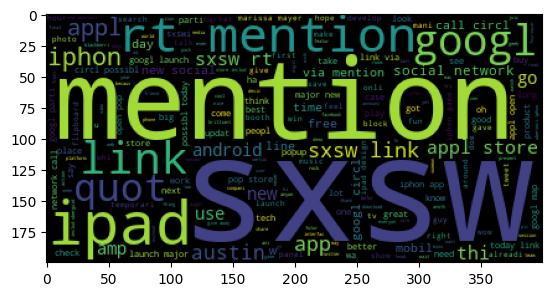

In [109]:
data = WordCloud().generate(text)
plt.imshow(data)

In [111]:
df['Text']

0                                  enjoy beauti day park
1                            traffic wa terribl thi morn
2                         finish amaz workout flex bicep
3                            excit upcom weekend getaway
4                           tri new recip dinner tonight
                             ...                        
727    collabor scienc project receiv recognit region...
728    attend surpris birthday parti organ friend sur...
729    success fundrais school chariti initi joy give...
730    particip multicultur festiv celebr divers musi...
731    organ virtual talent show dure challeng time b...
Name: Text, Length: 732, dtype: object

In [112]:
text = ' '.join(df['Text'])
text

'enjoy beauti day park traffic wa terribl thi morn finish amaz workout flex bicep excit upcom weekend getaway tri new recip dinner tonight feel grate littl thing life raini day call cozi blanket hot cocoa new movi releas must watch polit discuss heat timelin miss summer vibe beach day publish new blog post check feel bit weather today explor citi hidden gem new year new fit goal flex bicep technolog chang way live reflect past look ahead adopt cute furri friend paw print late night game session friend attend virtual confer ai winter blue got feel low sip coffe enjoy good book explor world virtual realiti product day tick list finish challeng workout routin celebr mileston work parti popper sunday brunch friend learn new languag person growth quiet even good book reflect import mental health new paint progress artist palett weekend road trip explor scenic view enjoy cup tea watch sunset code new project enthusiasm feel inspir attend workshop winter sport day local park qualiti time fami

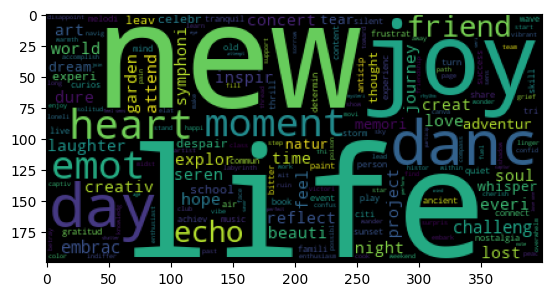

In [113]:
data = WordCloud().generate(text)
plt.imshow(data)

#### Sentiment Analysis

In [1]:
text = 'We are not satisfied with this Dell product and very very poor response from Amazon as well as Dell service center.'

In [2]:
import nltk

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
anz = SentimentIntensityAnalyzer()

In [5]:
anz.polarity_scores(text)

{'neg': 0.224, 'neu': 0.634, 'pos': 0.142, 'compound': -0.4945}

In [10]:
from textblob import TextBlob

In [12]:
blob = TextBlob(text)

In [13]:
blob.sentiment_assessments

Sentiment(polarity=-0.29, subjectivity=0.6266666666666667, assessments=[(['not', 'satisfied'], -0.25, 1.0, None), (['very', 'very', 'poor'], -0.52, 0.78, None), (['center'], -0.1, 0.1, None)])